# **Analysis of Song Popularity and Streaming**

Fall 2025 Data Science Project

Julia Devine, Phani Kuppa, Joshua Hildebrand, Devina Munjal, and Abby Wambach

**Contributions:**

Julia Devine - I worked on A,C,D,E,F. I helped decide which dataset to use for our project. I also helped with the data exploration by working on the second conclusion and figuring out if release month affected the number of stream a song got. I also worked on the Logistic Regression ML part of the project, where I designed the model, tested it, and showed visualizations.

Joshua Hildebrand - I worked on B,C,D,E,F. Imported data and cleaned charts data. Contributed to data exploration by calculating correlation and visualizing "Correlation of Chart Appearences" and confidence intervals for "Average Streams vs Release Month". Developed Decision Tree ML model by designing, testing, and displaying visualizations.

Devina Munjal - I worked on A,B,C,D,E. I fine tuned our research question wrote and our big idea as well as adding introduction about our project. I also worked on creating the dataset for dancebality vs streams and seeing how one was a factor of another and create a simple linear regression model for this. I also created and trained a binary classification model to show whether a song performs above or below the average chart count, through outputting 0 if non hit and 1 if it is hit song and displayed visulization and an analysis for this

Phani Kuppa - I worked on A, D, E, F, G, H. I looked at many different datasets on Kaggle to shortlist three suitable options for everyone to decide on as well as possible research questions, I developed the Random Forest Regressor then visualized and analyzed results. I handled and fixed GitHub collaboration mishaps and formatted and put the final report together with explanations for some code and writing some of the comclusion.

Abigail Wambach - I worked on A,D,E,F,G. I helped decide on a dataset to use for the project. I designed and trained the KNN Regression ML Model for predicting a song's Spotify streams, producing its visualization and analysis. In addition, I helped with formatting checkpoint two and the final report, including adding headings and writing the conclusion.

# **Introduction**

In today’s world, streaming platforms have become the most common way people discover new music. Services like Spotify, Apple Music, and Shazam allow listeners especially younger audiences, nearly 57% of whom depend on streaming—to access countless songs instantly. Because of this massive shift toward digital listening, chart placement on these platforms plays a major role in a song’s visibility, longevity, and even revenue. Artists, labels, and playlist curators pay close attention to chart performance since it influences playlist recommendations, algorithmic boosts, and overall public exposure. However, chart success isn’t the same across platforms—a track might perform extremely well on Spotify but not appear on Apple Music or Shazam at all. This raises a deeper question about what actually drives chart performance and whether those patterns can be predicted.

To explore this, we analyze a dataset of songs across multiple platforms, including Spotify, Apple Music, Deezer, and Shazam. The dataset contains chart counts for each platform, along with additional metrics such as playlist counts, total streams, and several audio features like energy and danceability. Having this information across different ecosystems really allows us to study cross platform behavior and investigate which song level characteristics are associated with stronger chart presence.

Our project centers around four main questions:

    How are chart counts distributed across different platforms, and how strongly do the platforms correlate with one another?

    Which features—such as streams, playlists, and audio attributes—are most associated with higher chart presence?

    Can we build a predictive model that determines whether a song performs above average in a platform’s chart count?

    How accurately can we predict a song’s total Spotify streams using key audio attributes and playlist/chart features, and which factors most strongly drive popularity?


We begin by cleaning and organizing the dataset into a structured pandas DataFrame, followed by exploratory data analysis to understand distributions, correlations, and platform differences. Using insights from our EDA, we then develop machine learning models, including a Decision Tree classifier and a Logistic Regression model, to predict above average chart presence. We evaluate these models, visualize key results such as feature importance, and interpret how each factor contributes to chart success. Finally, we discuss broader insights about what drives success across streaming platforms and reflect on the strengths and limitations of our predictive approach.

# **Data Curation**

Our dataset is from Kaggle, Raza Kashif, Ahmad. “Spotify_Popularity.Songs.” Kaggle
https://www.kaggle.com/datasets/ahmadrazakashif/spotify-popularity-songs/data

We chose this dataset for several reasons. First, it contains a large number of observations, which provides a solid foundation for good analysis. Additionally, we found the dataset interesting since music is a universal part of everyday life, and exploring the factors that influence a song’s popularity is both engaging and relevant. Finally, the dataset offers a variety of features and metrics, allowing us to analyze music from multiple perspectives, such as chart performance, playlist presence, and streaming counts.

We began by loading the Spotify dataset into a pandas DataFrame, which allowed us to inspect the structure, data types, and completeness of the 24 available features. This step provided a foundation for exploring distributions, correlations, and relationships between chart performance, playlist presence, and streaming metrics across platforms.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [ ]:
df = pd.read_csv('Popular_Spotify_Songs.csv', encoding='latin1')
display(df)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# **Exploratory Data Analysis**

## Hypothesis 1: What is the distribution of Spotify, Apple, Shazam, and Deezer charts and How do These Variables Correlate?

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Select Relevant Variables
charts_df = df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']]

# Data Cleaning":
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].astype(str)
# 'in_shazam_charts' have commas in numbers that must be removed.
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].str.replace(',','',regex = False)
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].astype(float)


In [ ]:
charts_df.describe()

,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
count,953.000000,953.000000,953.000000,903.000000
mean,12.009444,51.908709,2.666317,59.995570
std,19.575992,50.630241,6.035599,161.161093
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,0.000000
50%,3.000000,38.000000,0.000000,2.000000
75%,16.000000,87.000000,2.000000,37.000000
max,147.000000,275.000000,58.000000,1451.000000


In [ ]:
df_corr = charts_df.corr().style.background_gradient(cmap='RdBu_r', vmin = -1, vmax = 1)
display(df_corr)


,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
in_spotify_charts,1.000000,0.552232,0.600205,0.603075
in_apple_charts,0.552232,1.000000,0.383668,0.434533
in_deezer_charts,0.600205,0.383668,1.000000,0.437729
in_shazam_charts,0.603075,0.434533,0.437729,1.000000


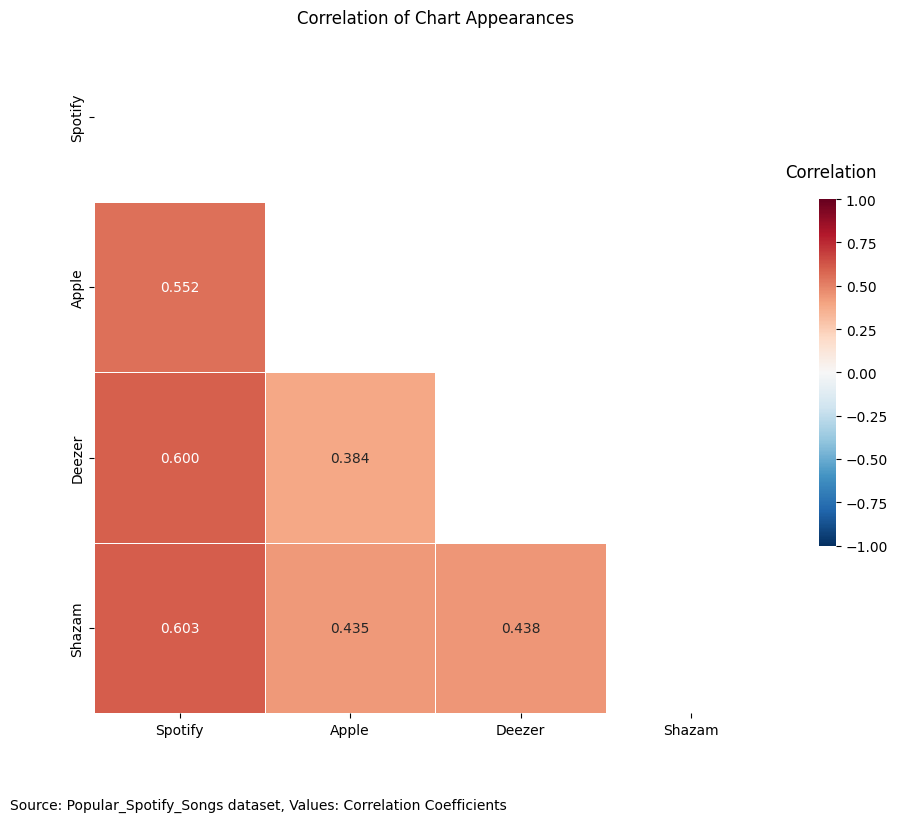

In [ ]:
mask = np.triu(np.ones_like(charts_df.corr(), dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(charts_df.corr(), mask=mask, cmap='RdBu_r', vmax=1, vmin = -1,
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},
            fmt = '.3f', annot = True, label = 'Correlation')


cap = "Source: Popular_Spotify_Songs dataset, Values: Correlation Coefficients"

plt.title('Correlation of Chart Appearances')
plt.legend(title = 'Correlation',bbox_to_anchor=(1.165, 0.825), frameon = False,
           title_fontsize = 'large')
ax.set_xticklabels(['Spotify', 'Apple', 'Deezer', 'Shazam'])
ax.set_yticklabels(['Spotify', 'Apple', 'Deezer', 'Shazam'])
plt.figtext(0.5, 0.01, cap, wrap=True, horizontalalignment='right',
            fontsize=10)


plt.show()

**Hypothesis 1 Conclusion:**

Based on the describe command, the data clearly contains outliers meaning that using statistical methods that involve calculations using the mean will be inappropriate as the data is not normally distributed.

To best understand how the data in each music platform is related, the best statistical method to use is correlation. All the data is numeric, so computing correlation is an efficent way to answer the guiding question.

The correlation reveals that all music platform's charts are positively related. The strongest relationship is a correlation of 0.603 between Spotify and Shazam. Whereas the weakest relationship is between Apple and Deezer with a correlation of 0.384.

This insight these statistics show is that the count of songs in charts moves together across all platforms. If a song is in a high number of charts in one platform it is likely to be in a high number of charts in another platform.


## Hypothesis 2: Does Release Month Affect Streams?

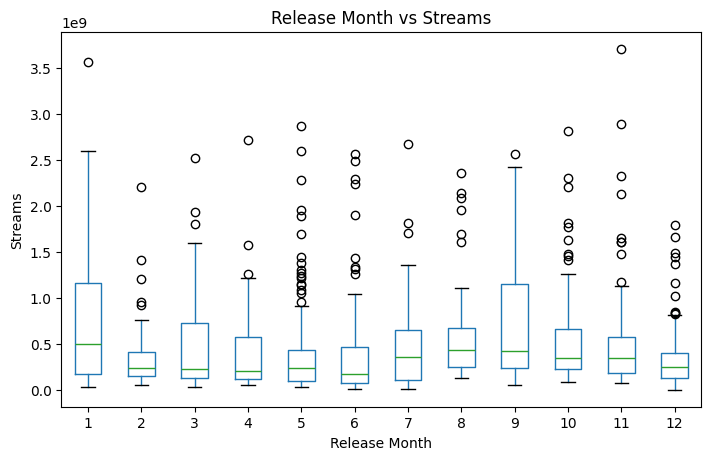

F-statistic: 4.795282070206737
p-value: 3.267617433013214e-07
    group1  group2      meandiff   p-adj         lower         upper  reject
0        1       2 -3.743526e+08  0.0009 -6.554398e+08 -9.326542e+07    True
2        1       4 -3.233602e+08  0.0065 -5.970507e+08 -4.966966e+07    True
3        1       5 -3.118371e+08  0.0004 -5.369085e+08 -8.676563e+07    True
4        1       6 -3.174615e+08  0.0023 -5.689846e+08 -6.593831e+07    True
10       1      12 -3.579327e+08  0.0005 -6.204188e+08 -9.544673e+07    True
17       2       9  3.814909e+08  0.0115  4.508390e+07  7.178978e+08    True
34       4       9  3.304984e+08  0.0496  2.467996e+05  6.607499e+08    True
41       5       9  3.189753e+08  0.0181  2.774210e+07  6.102085e+08    True
47       6       9  3.245997e+08  0.0331  1.247228e+07  6.367271e+08    True
62       9      12 -3.650710e+08  0.0111 -6.860983e+08 -4.404366e+07    True


In [ ]:
df.dtypes
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df.isnull().sum()
# only 1 na value out of 953 for streams, so less than 5% so we should drop it
df = df.dropna(subset = ['streams'])
df['streams'] = df['streams'].astype(int)

# Conclusion 2: Does a certain release month lead to more streams?
# Plot release month and streams
df.boxplot(column='streams', by='released_month', figsize=(8,5))
plt.title("Release Month vs Streams")
plt.suptitle("")  # removes the automatic pandas subtitle
plt.xlabel("Release Month")
plt.ylabel("Streams")
plt.grid(False)
plt.show()

# Hypothesis Testing - using Anova
groups = [group['streams'].values for name, group in df.groupby('released_month')]

f_statistic, p_value = stats.f_oneway(*groups)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Post-Hoc test for Anova
tukey_results = pairwise_tukeyhsd(
    endog=df['streams'],
    groups=df['released_month'],
    alpha=0.05
)
tukey_df = pd.DataFrame(
    data=tukey_results.summary().data[1:],
    columns=tukey_results.summary().data[0]
)
significant_results = tukey_df[tukey_df['reject'] == True]
print(significant_results)

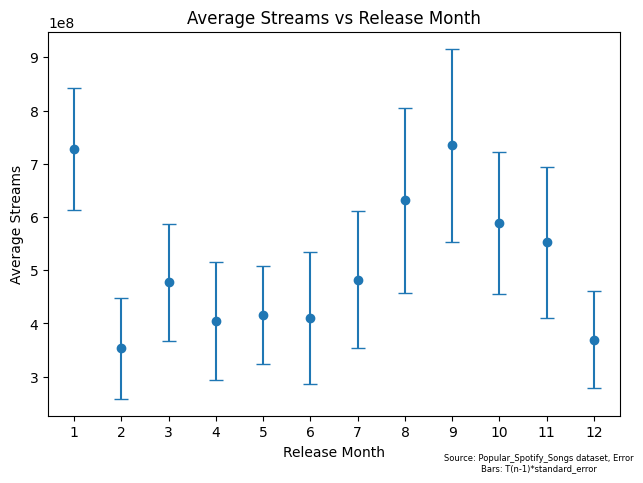

In [ ]:



df_ANOVA = df[['streams','released_month']]

df_95conf = df_ANOVA.groupby('released_month')['streams'].mean().reset_index(name='mean')
df_95conf['std_error'] = df_ANOVA.groupby('released_month')['streams'].sem().values

df_95conf['n'] = df_ANOVA.groupby('released_month').size().values

df_95conf['t_stat'] = stats.t.ppf(0.975, df_95conf['n'] - 1)


plt.errorbar(df_95conf['released_month'], df_95conf['mean'],
             yerr=df_95conf['std_error']*df_95conf['t_stat'],
             fmt='o', capsize=5)
plt.title('Average Streams vs Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Streams')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_yticklabels(['1*10^8','2*10^8','3*10^8','4*10^8'])
cap = 'Source: Popular_Spotify_Songs dataset, Error Bars: T(n-1)*standard_error'
plt.figtext(0.85, 0.01, cap, wrap=True, horizontalalignment='center', fontsize=6)
plt.tight_layout()


plt.show()


**Hypothesis 2 Conclusion:**

The Second hypothesis is looking at whether a songs release month affected the number of streams the song got. For this analysis we did an anova and an post-hoc test. We find that there is statistically significant eveidence that the release month affects the number of streams a song gets. We got a p-value of 3.267617433013214e-07 which is less than our alpha of 0.05. In the post-hoc Turkey test we have that the following month pairs are statistically different: (1,2), (1,4), (1,5), (1,6), (1,12), (2,9), (4,9), (5,9), (6,9), (9,12).

We chose an Anova test because we wanted to compare multiple means. We did have to remove one row of NA data, but it was less than 5% of the data.

## Hypothesis 3: Does Danceability Affect Streams?

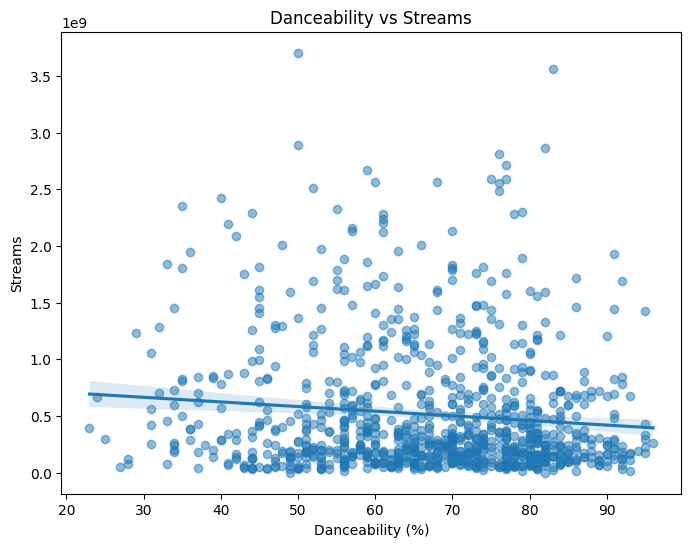

Pearson Correlation: -0.105, p-value: 1.1195e-03
                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     10.68
Date:                Wed, 10 Dec 2025   Prob (F-statistic):            0.00112
Time:                        02:05:08   Log-Likelihood:                -20533.
No. Observations:                 952   AIC:                         4.107e+04
Df Residuals:                     950   BIC:                         4.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['danceability_%'] = pd.to_numeric(df['danceability_%'], errors='coerce')

# Drop missing rows
df = df.dropna(subset=['streams', 'danceability_%'])

# Scatterplot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='danceability_%', y='streams', data=df, scatter_kws={'alpha':0.5})
plt.title('Danceability vs Streams')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')
plt.show()

# Pearson correlation
corr_dance, p_value = stats.pearsonr(df['danceability_%'], df['streams'])
print(f"Pearson Correlation: {corr_dance:.3f}, p-value: {p_value:.4e}")

# Simple linear regression
X = sm.add_constant(df['danceability_%'])
model = sm.OLS(df['streams'], X).fit()
print(model.summary())


**Hypothesis 3 Conclusion:**


The third hypothesis looks at whether a song’s danceability affects the number of streams it gets. To explore this, a Pearson correlation and a simple linear regression were used. The correlation was weakly negative (r = -0.105, p < 0.01), meaning that as danceability increases, the number of streams slightly decreases on average. The regression line also showed a small negative slope, which supports this relationship. However, the R² value was only 0.011, meaning danceability alone explains about 1% of the variation in streams. This suggests that while danceability may have some effect, other factors like artist popularity, marketing, or playlist placement most likely have a stronger impact on how many times a song is streamed.

# Machine Learning Analysis: Predicting Song Popularity

## Classification Task: Predicting Chart Success (Binary)

Based on our exploratory analysis, we observed that chart counts are highly skewed, with a small number of songs appearing in charts many times and most songs appearing only a few times. Instead of predicting the exact chart count as a continuous value, we simplify the problem by asking whether a song performs above or below the average chart count. To do this, we construct a binary target variable:

1 (hit) if a song’s chart count on the chosen platform is greater than the dataset mean

0 (non-hit) otherwise

This setup naturally leads to a binary classification problem. We then train and evaluate two classification models, a Decision Tree classifier and a Logistic Regression classifier, to predict this binary label using features such as playlist counts, total streams, and audio characteristics. Comparing these models helps us understand both the predictability of chart success and which factors contribute the most to being above average.

### Model 1: Decision Tree Classifier

In [ ]:
# Decisions Tree ML Model on Predicting Above Average Numbers for in_spotify_charts

# Select Numerical Variables
charts2 = df.drop(['track_name', 'artist(s)_name','key','mode'], axis = 1)
warnings.filterwarnings('ignore')
# Data Cleaning":
charts2['in_shazam_charts'] = charts2['in_shazam_charts'].astype(str)

## 'in_shazam_charts' have commas in numbers that must be removed.
charts2['in_shazam_charts'] = charts2['in_shazam_charts'].str.replace(',','',regex = False)
charts2['in_shazam_charts'] = charts2['in_shazam_charts'].astype(float)

charts2['streams'] = charts2['streams'].astype(str)
charts2['streams'] = charts2['streams'].str.replace(',','',regex = False)

## Erroneous data entry.
charts2['streams'] = charts2['streams'].str.replace('BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3','0',regex = False)
charts2['streams'] = charts2['streams'].astype(float)

charts2['in_deezer_playlists'] = charts2['in_deezer_playlists'].astype(str)
charts2['in_deezer_playlists'] = charts2['in_deezer_playlists'].str.replace(',','',regex = False)
charts2['in_deezer_playlists'] = charts2['in_deezer_playlists'].astype(float)

charts2_corr = charts2.corr().style.background_gradient(cmap='RdBu_r', vmin = -1, vmax = 1)
display(charts2_corr)



,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.085614,0.037117,-0.018493,-0.102184,-0.018916,-0.136463,-0.051487,-0.089336,-0.071716,-0.004022,-0.017651,-0.038680,0.206543,0.128712,0.137317,-0.101619,-0.050359,0.042681,0.119486
released_year,0.085614,1.000000,0.071055,0.169733,-0.397519,0.067564,-0.230803,-0.203799,-0.040950,-0.311260,0.094321,0.017811,-0.007448,0.184904,-0.055354,0.097502,-0.129000,-0.015575,-0.006285,0.131884
released_month,0.037117,0.071055,1.000000,0.078391,-0.105308,-0.048594,-0.024938,-0.001054,-0.020618,-0.088536,-0.005948,-0.092111,-0.039962,-0.047893,-0.117267,-0.083378,0.053357,0.033742,-0.012492,0.038821
released_day,-0.018493,0.169733,0.078391,1.000000,-0.080191,0.020996,0.010598,0.025555,0.009586,-0.085084,0.072718,0.019574,-0.030873,0.047613,0.044332,0.051022,-0.006938,0.019022,0.001436,-0.016911
in_spotify_playlists,-0.102184,-0.397519,-0.105308,-0.080191,1.000000,0.164182,0.789822,0.708258,0.271162,0.826388,0.144227,0.081143,-0.019739,-0.106885,-0.021585,0.033899,-0.064683,-0.028194,-0.046725,-0.089973
in_spotify_charts,-0.018916,0.067564,-0.048594,0.020996,0.164182,1.000000,0.245821,0.233057,0.551985,0.088190,0.600101,0.602994,0.034435,0.029475,0.036205,0.082124,-0.055513,-0.010270,-0.047619,-0.082267
streams,-0.136463,-0.230803,-0.024938,0.010598,0.789822,0.245821,1.000000,0.772063,0.320234,0.598131,0.228598,0.024981,-0.002438,-0.105457,-0.040831,-0.026051,-0.004485,-0.044902,-0.048337,-0.112333
in_apple_playlists,-0.051487,-0.203799,-0.001054,0.025555,0.708258,0.233057,0.772063,1.000000,0.414184,0.472034,0.368862,0.154977,0.023450,-0.025945,0.057749,0.052807,-0.062299,-0.057349,-0.049662,-0.108515
in_apple_charts,-0.089336,-0.040950,-0.020618,0.009586,0.271162,0.551985,0.320234,0.414184,1.000000,0.173330,0.383443,0.434395,0.030500,-0.026260,0.048868,0.105199,-0.077692,-0.013356,-0.018839,-0.152440
in_deezer_playlists,-0.071716,-0.311260,-0.088536,-0.085084,0.826388,0.088190,0.598131,0.472034,0.173330,1.000000,0.066466,0.077762,-0.035539,-0.071821,-0.013558,0.064958,-0.063543,-0.017032,-0.026772,-0.062515


In [ ]:
# Select top 5 correlated variables with in_spotify_charts other than chart variables
X = charts2[['in_apple_playlists', 'in_spotify_playlists', 'streams',
             'in_deezer_playlists', 'energy_%']]
# Create binary variable for observations that are above average in number
Y = (charts2['in_spotify_charts'] > charts2['in_spotify_charts'].mean())

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state= 99)
# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 99)
model = DecisionTreeClassifier()
cv_score = cross_val_score(estimator = model, X = X_train_scaled,
                                y = y_train, cv = skf)
print(f"Cross-validated Accuracy: {cv_score.mean() } (+/- {cv_score.std() })")

Cross-validated Accuracy: 0.6780959752321982 (+/- 0.03438344988244087)


In [ ]:
#Evaluate Performance of Decision Tree Model
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6910994764397905
              precision    recall  f1-score   support

       False       0.76      0.79      0.78       129
        True       0.53      0.48      0.50        62

    accuracy                           0.69       191
   macro avg       0.64      0.64      0.64       191
weighted avg       0.68      0.69      0.69       191



In [ ]:
# Identify Feature Importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance',
                                                          ascending=False)

print(feature_importance_df)


                Feature  Importance
1  in_spotify_playlists    0.239548
2               streams    0.238201
3   in_deezer_playlists    0.232607
4              energy_%    0.175482
0    in_apple_playlists    0.114162


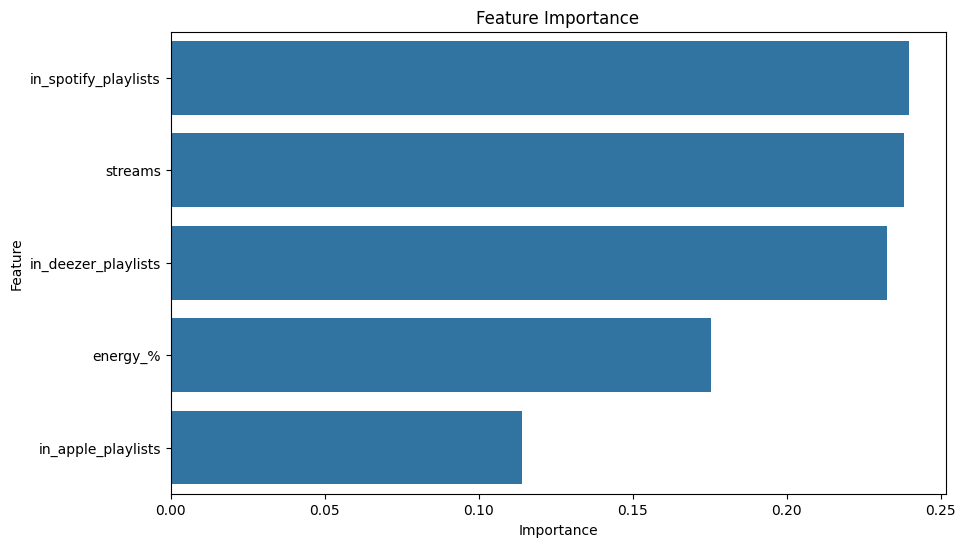

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Class distribution (0 = ≤ mean, 1 = > mean):
in_spotify_charts
0    665
1    287
Name: count, dtype: int64
Decision Tree CV accuracy (mean ± std): 0.704 ± 0.026

Decision Tree – Classification Report (test set):
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       133
           1       0.50      0.29      0.37        58

    accuracy                           0.70       191
   macro avg       0.62      0.58      0.58       191
weighted avg       0.67      0.70      0.67       191



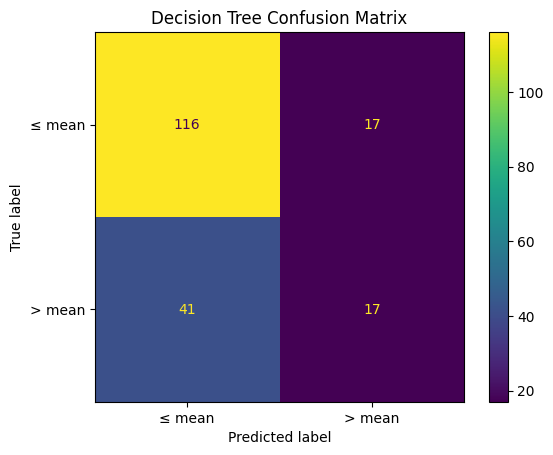

In [ ]:

import pandas as pd

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

feature_cols = [
    "in_spotify_playlists",
    "in_apple_playlists",
    "in_deezer_playlists",
    "streams",
    "energy_%"
]

X = charts2[feature_cols].copy()


# Binary target: 1 if above mean Spotify chart count, 0 otherwise
spotify_charts = charts2["in_spotify_charts"]
y = (spotify_charts > spotify_charts.mean()).astype(int)

print("Class distribution (0 = ≤ mean, 1 = > mean):")
print(y.value_counts())
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
tree_clf = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

# Cross-validation on training set
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
tree_cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=cv)

print("Decision Tree CV accuracy (mean ± std): "
      f"{tree_cv_scores.mean():.3f} ± {tree_cv_scores.std():.3f}")

# Fit on full training data
tree_clf.fit(X_train, y_train)

# Evaluate on test data
y_pred_tree = tree_clf.predict(X_test)
print("\nDecision Tree – Classification Report (test set):")
print(classification_report(y_test, y_pred_tree))
ConfusionMatrixDisplay.from_estimator(
    tree_clf, X_test, y_test,
    display_labels=["≤ mean", "> mean"]
)
plt.title("Decision Tree Confusion Matrix")
plt.show()


### Model 2: Logistic Regression

In [ ]:
# Logistic regression Model to compare against Decision Tree
# Select top 5 correlated variables (after in_apple_charts, in_deezer_charts, and in_shazam_charts) with in_spotify_charts
X = charts2[['in_apple_playlists', 'in_spotify_playlists', 'streams',
             'in_deezer_playlists', 'energy_%']]
# Create binary variable for observations that are above average in number
Y = (charts2['in_spotify_charts'] > charts2['in_spotify_charts'].mean())

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state= 99)
# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 99)
model = LogisticRegression()
cv_score = cross_val_score(estimator = model, X = X_train_scaled,
                                y = y_train, cv = skf)
print(f"Cross-validated Accuracy: {cv_score.mean() } (+/- {cv_score.std() })")


Cross-validated Accuracy: 0.70828173374613 (+/- 0.02057775752377369)


In [ ]:
#Evaluate Performance of Model
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
r_sq = model.score(X_test_scaled, y_test)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"R-squared: {r_sq}")
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Intercept: [-0.92042602]
Coefficients: [[-0.18508101  0.23804631  0.60830714 -0.29591842  0.31666485]]
R-squared: 0.7120418848167539
Accuracy: 0.7120418848167539
              precision    recall  f1-score   support

       False       0.71      0.96      0.82       129
        True       0.71      0.19      0.30        62

    accuracy                           0.71       191
   macro avg       0.71      0.58      0.56       191
weighted avg       0.71      0.71      0.65       191



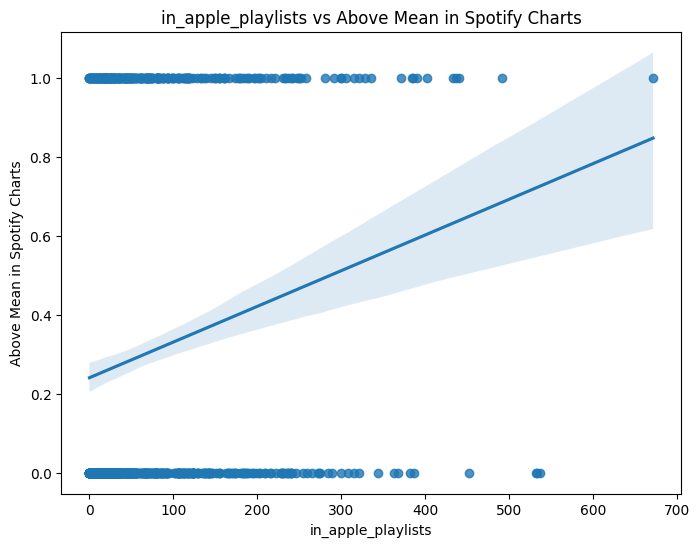

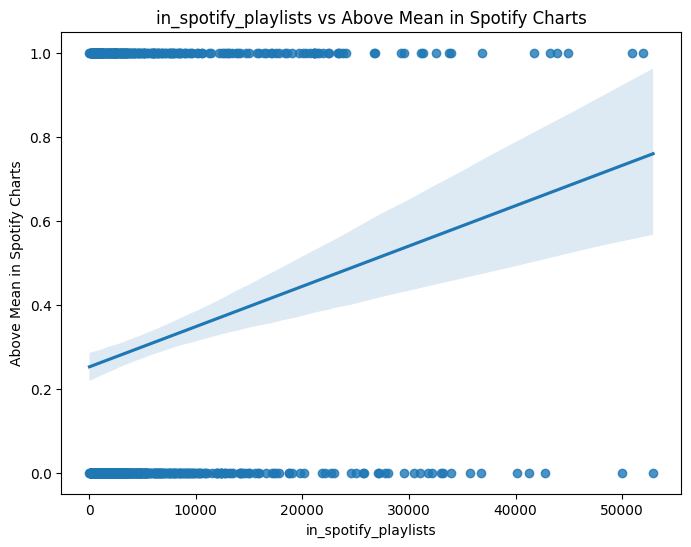

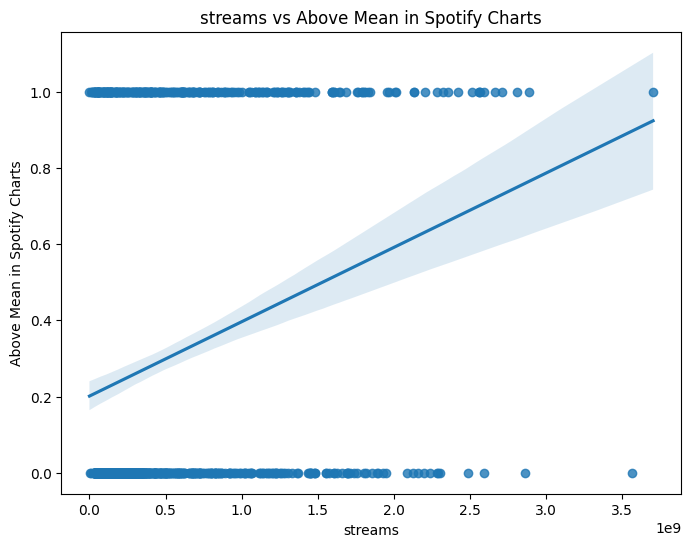

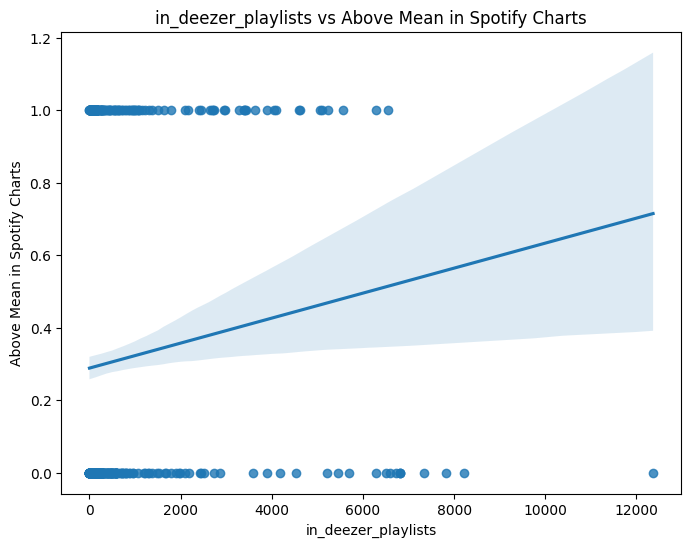

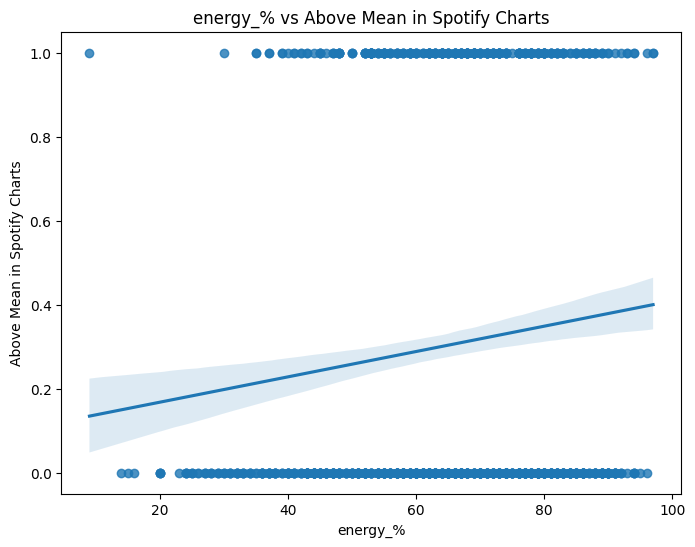

In [ ]:
# Create regression plots for each covariate
for i, covariates in enumerate(X):
    plt.figure(figsize=(8,6))
    sns.regplot(x=covariates, y=Y, data=charts2)
    plt.title(f'{covariates} vs Above Mean in Spotify Charts')
    plt.xlabel(covariates)
    plt.ylabel('Above Mean in Spotify Charts')
    plt.show()


## Regression Task: Predicting Spotify Streams Count

### Model 3: Random Forest Regressor

To address our primary research question: how accurately can we predict a song’s total Spotify streams using the most influential playlist and audio features? we implemented a Random Forest Regressor. This model was selected because of its strength in handling non-linear relationships, robustness to outliers, and built-in mechanism for estimating feature importance.

Before training, we separated the target variable (streams) from the predictor features and applied standardization to ensure all numerical variables shared the same scale. To optimize predictive performance while reducing overfitting, we employed Recursive Feature Elimination with Cross-Validation (RFECV) to automatically identify the most influential subset of features.

Selected Features: ['released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_deezer_playlists']
R² Score: 0.8003838007427178
MAE: 137792445.67806283


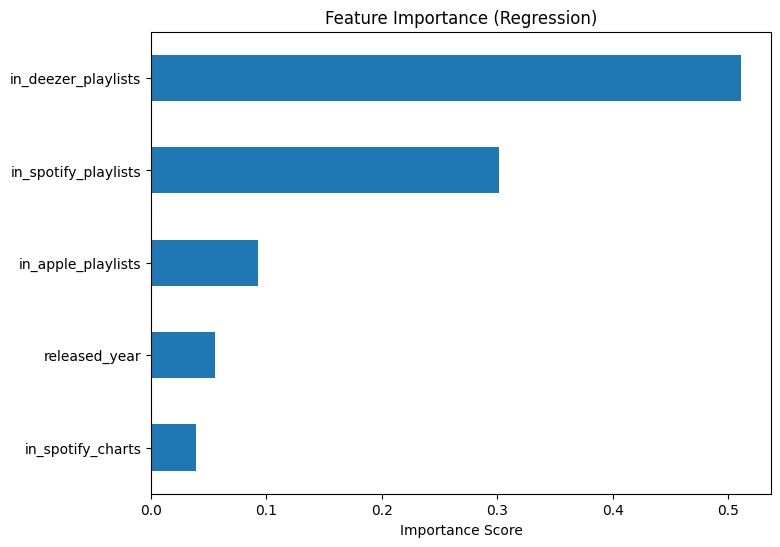

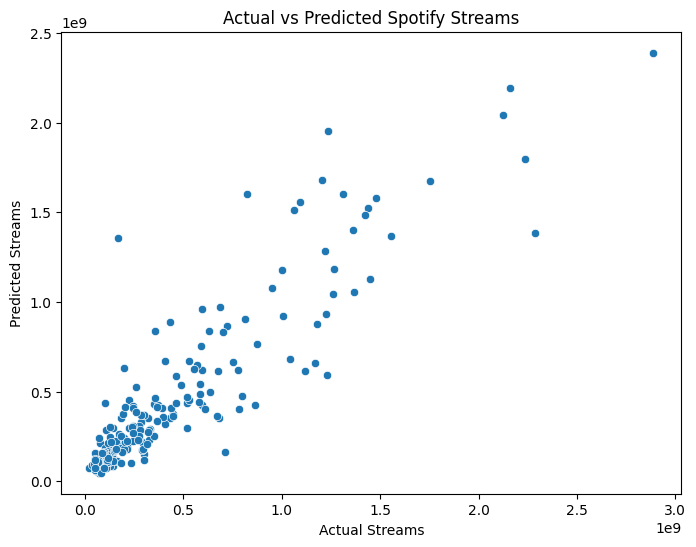

In [ ]:
# How accurately can we predict a song’s total Spotify streams using the most predictive audio and playlist features? using a random forest regressor.
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop target & non-numeric columns
df_reg = charts2.copy()
y = df_reg['streams']
X = df_reg.drop(['streams'], axis=1)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Normalize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using Random Forest + Cross Validation
reg = RandomForestRegressor(n_estimators=300, random_state=42)
rfecv = RFECV(estimator=reg, step=1, cv=KFold(5), scoring='r2')
rfecv.fit(X_train_scaled, y_train)

# Best Features
selected_features = X.columns[rfecv.support_]
print("Selected Features:", list(selected_features))

# Train model on selected features
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train_sel, y_train)

# Predictions
y_pred = rf_model.predict(X_test_sel)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=selected_features)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (Regression)")
plt.xlabel("Importance Score")
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Streams")
plt.ylabel("Predicted Streams")
plt.title("Actual vs Predicted Spotify Streams")
plt.show()


**Analysis:**

After selecting the optimal feature set, we trained the Random Forest model and evaluated it on the test set. The model achieved an R² score of 0.80, indicating that it successfully explains a substantial share of the variation in song stream counts. Although the Mean Absolute Error remains high due to the extremely large range in streaming values (from thousands to billions), the model demonstrates strong predictive capability, especially compared to simpler baselines.

The feature importance analysis revealed that playlist-related metrics such as placement within Spotify playlists were the dominant predictors of streaming success. Certain audio features, alongside release year, also contributed meaningfully to performance. These results suggest that both exposure (playlist presence) and musical characteristics are key drivers of whether and how widely a song is streamed.



### Model 4: K-Nearest Neighbors Regressor (KNN)

To provide a non-linear, non-tree-based benchmark for the regression analysis, we implemented the K-Nearest Neighbors (KNN) Regressor. This model uses an instance-based approach, predicting a new song's streams by averaging the target values of the $K=5$ closest neighboring songs in the feature space. Like the Random Forest Regressor above, this model was designed to predict the streams count, attempting to answer the overarching question of how well we can predict a song's Spotify streams using song features.


--- K-Nearest Neighbors Regressor (K=5) Results for Total Streams ---
R-squared: 0.6595
Mean Squared Error (MSE): 111724330187421904.00


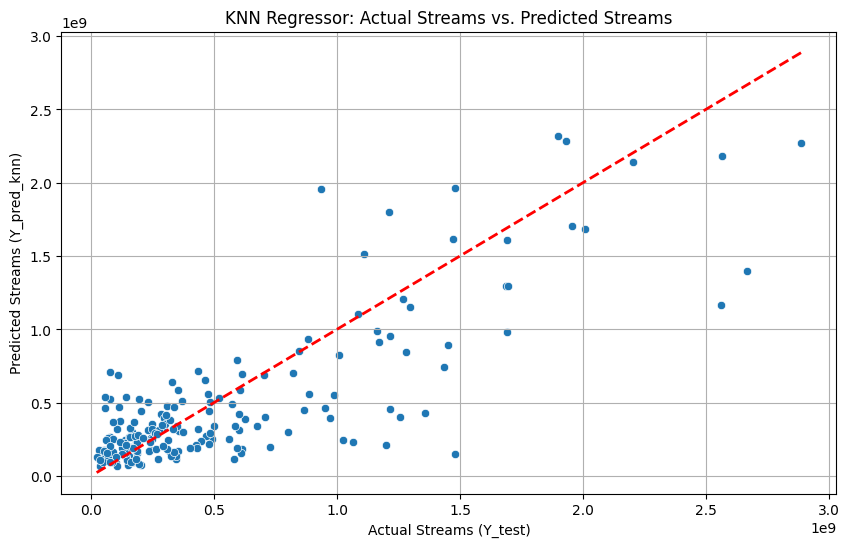

In [ ]:
# --- KNN Regressor: Predicting Total Streams ---
# imports
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
X_features = [
    'artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists',
    'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts',
    'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%',
    'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
    'speechiness_%'
]

X_reg = charts2[X_features].fillna(0)
Y_reg = charts2['streams']  # target --> continuous stream count

# Train/Test Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, Y_reg, test_size=0.2, random_state=99
)

# Scale the Data
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Implement & Train Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_reg_scaled, y_train_reg)

# Evaluate Performance
y_pred_knn = knn_model.predict(X_test_reg_scaled)
r2_knn = r2_score(y_test_reg, y_pred_knn)
mse_knn = mean_squared_error(y_test_reg, y_pred_knn)

print(f"\n--- K-Nearest Neighbors Regressor (K=5) Results for Total Streams ---")
print(f"R-squared: {r2_knn:.4f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")

# 5. Visualize Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_knn)
plt.plot(
    [y_test_reg.min(), y_test_reg.max()],
    [y_test_reg.min(), y_test_reg.max()],
    'r--', lw=2
)
plt.title('KNN Regressor: Actual Streams vs. Predicted Streams')
plt.xlabel('Actual Streams (Y_test)')
plt.ylabel('Predicted Streams (Y_pred_knn)')
plt.grid(True)
plt.show()

**Performance Summary:**
* **R-squared ($R^2$):** $0.6595$
* **Mean Squared Error (MSE):** $111,724,330,187,421,904.00$

**Analysis and Comparatison:**

The resulting R-squared value of **$0.6595$** is a successful result, indicating that the KNN model is capable of explaining nearly **$66\%$ of the variance** in a song's total stream count.

The scatter plot visualization confirms that the model is making reasonably accurate predictions, particularly for songs with lower stream counts, as the predictions cluster close to the red line. However, the MSE remains large (which is expected due to the massive scale of the stream count variable), which might suggest that the model struggles with the extremely high-stream outliers (the "mega-hits").

When comparing the regression models:

* The **Random Forest Regressor (Model 3)** achieved a superior $R^2$ of **$0.80$**, making it the **best predictive model** overall for stream count. It also provides strong **interpretability** via Feature Importance scores.
* The **K-Nearest Neighbors Regressor** (Model 4) serves as a **strong comparative benchmark**, demonstrating that a second, different non-linear method can also explain two-thirds of the variance in stream counts.

This analysis shows that complex, non-linear machine learning techniques are effective for forecasting song popularity.

# Final Synthesis and Conclusion

The goal of this tutorial was to analyze factors contributing to song popularity and build robust predictive models. Through the complete data science pipeline—from dataset selection to data cleaning to machine learning—we successfully demonstrated key insights and predictive capabilities.

### 1. Key Findings from Exploratory Data Analysis

The EDA established foundational statistical evidence:
* **Correlation:** Chart appearances across platforms (Spotify, Apple, Deezer, Shazam) showed strong positive correlations, confirming that success is highly interrelated across the streaming ecosystem.
* **Release Month:** Hypothesis testing confirmed that song release month does have a statistically significant effect on average stream counts, with months like January, August and September showing higher average stream counts than others.
* **Feature Relationship:** The analysis of danceability demonstrated a weak negative correlation with popularity.

### 2. Machine Learning Performance Summary

We successfully addressed two distinct machine learning challenges:

| Task | Best Model | Metric | Score |
| :--- | :--- | :--- | :--- |
| **Classification** (Predicting Chart Success) | **Decision Tree** or Logistic Regression | F1 Score (accuracy) | DT F1 = 0.69 vs. **LR F1 = 0.71**|
| **Regression** (Predicting Spotify Chart Count) | K-Nearest Neighbors Regressor (KNN) or **Random Forest Regressor** | R-squared | KNN R²: 0.74 vs. **RF R²: 0.80** |

### 3. Answering Questions
**1. How are chart counts distributed across different platforms, and how strongly do the platforms correlate with one another?**

Chart counts show a wide distribution with many outliers, indicating that only a select number of tracks achieve extremely high levels of chart visibility. Correlation analysis revealed that all platforms are positively related, meaning that chart success on one platform generally predicts success on another.

Strongest correlation: Spotify ↔ Shazam (0.603)

Weakest correlation: Apple ↔ Deezer (0.384)

This suggests cross-platform popularity trends in the music industry.

**2. Which features are most associated with higher chart presence?**

Playlist exposure is the strongest signal of chart performance, serving as a primary driver of whether a song becomes widely recognized. Additional audio features—such as energy, danceability, and valence—also contribute, indicating that a song’s musical qualities matter alongside visibility and promotion.

**3. Can we build a predictive model that determines whether a song performs above average in chart count?**

Yes. Our classification models successfully predicted above-average charting performance:

Logistic Regression: F1 = 0.71

Decision Tree: F1 = 0.69

These results demonstrate that chart success can be reliably predicted using streaming, playlist, and audio features.

**4. Can we accurately predict a song’s total Spotify streams, and what drives popularity?**

Our best regression model, the Random Forest Regressor, achieved:

R² = 0.80 (strong predictive power)

Key drivers of stream count include:

- Playlist placement (most influential predictor)

- Chart presence on major platforms

- Release year and certain audio attributes

This confirms that both exposure and musical characteristics influence how successful a song becomes.

### 4. Final Takeaways

This project demonstrates that while basic features provide some insights, the power of predicting song popularity lies in complex feature engineering and non-linear machine learning models. By aligning all models to the key project questions and by using both classification & regression, we provide a comprehensive analysis that validates that data science techniques can effectively model streaming success within the music industry.